In [1]:
from google.colab import files
data_to_load=files.upload()

Saving Loan_Data.csv to Loan_Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Loan_Data.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,M,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,M,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,M,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,M,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df=df.drop(['Loan_ID'],axis=1)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,M,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,M,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,M,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,M,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,M,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
a=df['Gender'].mode()
a

0    M
dtype: object

In [8]:
df['Gender'].fillna('M', inplace=True)

In [9]:
a=df['Married'].mode()
a

0    Yes
dtype: object

In [10]:
df['Married'].fillna('Yes', inplace=True)

In [11]:
a=df['Self_Employed'].mode()
a

0    No
dtype: object

In [12]:
df['Self_Employed'].fillna('No', inplace=True)

In [13]:
a=df['Dependents'].mode()
a

0    0.0
dtype: float64

In [14]:
df['Dependents'].fillna(0.0, inplace=True)

In [15]:
a=df['LoanAmount'].median()
a

128.0

In [16]:
df['LoanAmount'].fillna(128, inplace=True)

In [17]:
a=df['Loan_Amount_Term'].median()
a

360.0

In [18]:
df['Loan_Amount_Term'].fillna(360, inplace=True)

In [19]:
a=df['Credit_History'].mode()
a

0    1.0
dtype: float64

In [20]:
df['Credit_History'].fillna(1, inplace=True)

In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
cat=df.select_dtypes(exclude=['int32', 'int64','float64'])
num=df.select_dtypes(include=['int32', 'int64','float64'])

In [23]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = cat.apply(LabelEncoder().fit_transform)

In [24]:
cat.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1


In [25]:
df = pd.concat([cat, num], axis=1)
df.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,2,1,0.0,5849,0.0,128.0,360.0,1.0
1,1,1,0,0,0,0,1.0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,1,2,1,0.0,3000,0.0,66.0,360.0,1.0
3,1,1,1,0,2,1,0.0,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,2,1,0.0,6000,0.0,141.0,360.0,1.0


In [26]:
#use onehotcoding by get dummies of categorical
#df=pd.get_dummies(df, columns=['Gender','Married','Self_Employed','Property_Area','Education'],drop_first = True)
#df.head(5)

In [27]:
df['Total_Inceome']=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [28]:
df=df.drop(['ApplicantIncome','CoapplicantIncome'], axis = 1) 
df.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Total_Inceome
0,1,0,0,0,2,1,0.0,128.0,360.0,1.0,5849.0
1,1,1,0,0,0,0,1.0,128.0,360.0,1.0,6091.0
2,1,1,0,1,2,1,0.0,66.0,360.0,1.0,3000.0
3,1,1,1,0,2,1,0.0,120.0,360.0,1.0,4941.0
4,1,0,0,0,2,1,0.0,141.0,360.0,1.0,6000.0


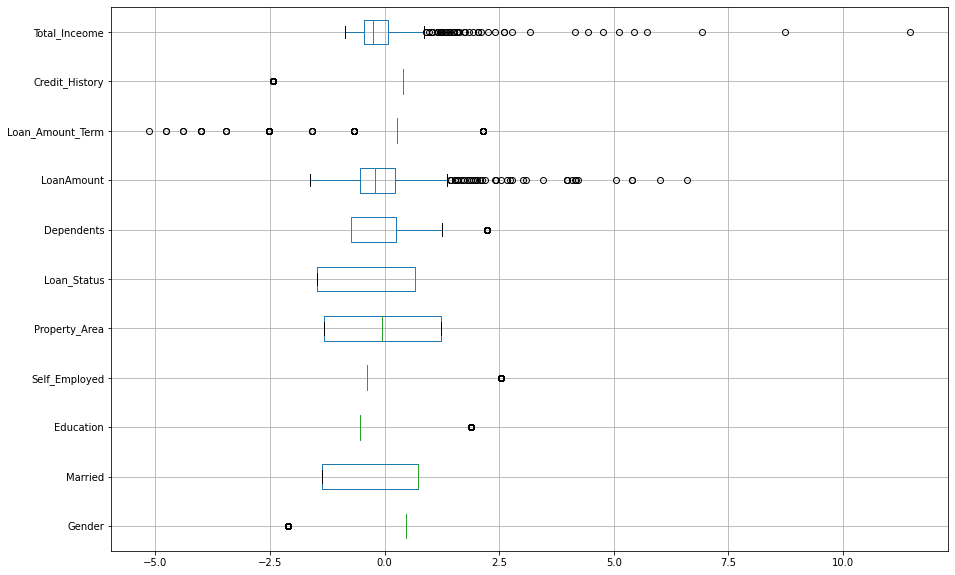

In [29]:
#Outlier check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df)

z=pd.DataFrame(scaler.transform(df),columns=df.columns)
z.boxplot(vert=False,figsize=(15,10))

In [30]:
#Q1 = df["LoanAmount"].quantile(0.25)
#Q3 = df["LoanAmount"].quantile(0.75)

#IQR = Q3 - Q1
#print(IQR)
#df["LoanAmount"] = np.where(df["LoanAmount"] >= (Q3 + 1.5 * IQR), Q3, df["LoanAmount"])
#df["LoanAmount"] = np.where(df["LoanAmount"] <= (Q1 - 1.5 * IQR), Q1, df["LoanAmount"])

In [31]:
#Q1 = df["Total_Inceome"].quantile(0.25)
#Q3 = df["Total_Inceome"].quantile(0.75)

#IQR = Q3 - Q1
#print(IQR)
#df["Total_Inceome"] = np.where(df["Total_Inceome"] >= (Q3 + 1.5 * IQR), Q3, df["Total_Inceome"])
#df["Total_Inceome"] = np.where(df["Total_Inceome"] <= (Q1 - 1.5 * IQR), Q1, df["Total_Inceome"])

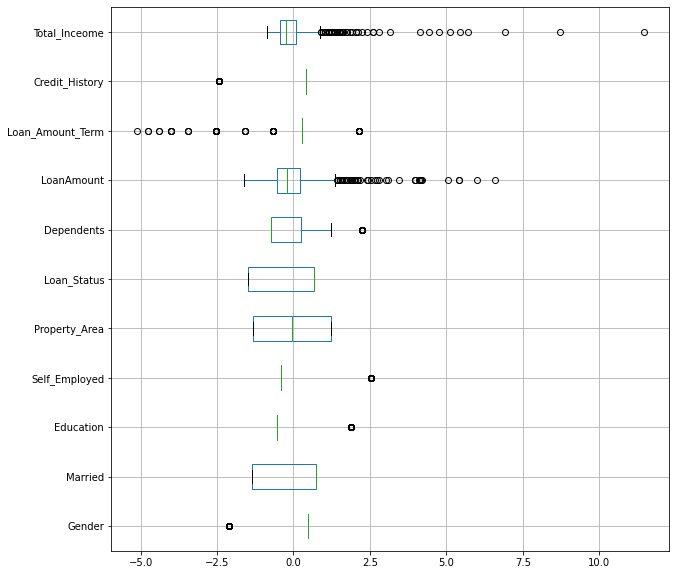

In [32]:
#Outlier check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df)

z=pd.DataFrame(scaler.transform(df),columns=df.columns)
z.boxplot(vert=False,figsize=(10,10))

In [33]:
df=df.drop(['LoanAmount'],axis=1)

In [34]:
#df=df.drop(['Property_Area_1'],axis=1)

In [35]:
#df=df.drop(['Total_Inceome','Total_Inceome'],axis=1)

In [36]:
X = df.drop(["Loan_Status"], axis = 1)
y = df["Loan_Status"]
X

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Loan_Amount_Term,Credit_History,Total_Inceome
0,1,0,0,0,2,0.0,360.0,1.0,5849.0
1,1,1,0,0,0,1.0,360.0,1.0,6091.0
2,1,1,0,1,2,0.0,360.0,1.0,3000.0
3,1,1,1,0,2,0.0,360.0,1.0,4941.0
4,1,0,0,0,2,0.0,360.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.0,360.0,1.0,2900.0
610,1,1,0,0,0,3.0,180.0,1.0,4106.0
611,1,1,0,0,2,1.0,360.0,1.0,8312.0
612,1,1,0,0,2,2.0,360.0,1.0,7583.0


In [37]:
# Two features with highest chi-squared statistics are selected 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 

In [38]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,Gender,0.036234
1,Married,1.782425
2,Education,3.540502
3,Self_Employed,0.007285
4,Property_Area,0.377837
5,Dependents,0.085953
6,Loan_Amount_Term,3.778554
7,Credit_History,26.005877
8,Total_Inceome,3559.550362


In [39]:
#X=X.drop(['Property_Area_2','Self_Employed_1','Dependents','Gender_1'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [41]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
print(X_train.shape)
print(y_train.shape)

(429, 9)
(429,)


In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test=sc.transform(x_test)
print(x_test.shape)

(185, 9)


In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [44]:
# Initialising the ANN
classifer=Sequential()
#adding the input and first hidden layer
classifer.add(Dense(output_dim=5,kernel_initializer='glorot_uniform',activation='relu',input_dim=9))
classifer.add(Dropout(p=0.2))
#adding the input and Second hidden layer
classifer.add(Dense(output_dim=5,kernel_initializer='glorot_uniform',activation='relu'))
classifer.add(Dropout(p=0.2))
#adding the output layer
classifer.add(Dense(output_dim=1,kernel_initializer='glorot_uniform',activation="sigmoid"))
# Adding dropout to prevent overfitting


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="relu", input_dim=9, units=5)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="relu", units=5)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="sigmoid", units=1)`
  # Remove the CWD from sys.path while we load s

In [45]:
# Compiling the ANN
classifer.compile(optimizer="AdaDelta",loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
# Fitting the ANN to the Training set
classifer.fit(X_train,y_train, batch_size=10,nb_epoch=200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/200
429/429 [==============================] - 0s 889us/step - loss: 0.7059 - accuracy: 0.6014
Epoch 2/200
429/429 [==============================] - 0s 120us/step - loss: 0.6794 - accuracy: 0.6200
Epoch 3/200
429/429 [==============================] - 0s 119us/step - loss: 0.6605 - accuracy: 0.6597
Epoch 4/200
429/429 [==============================] - 0s 123us/step - loss: 0.6614 - accuracy: 0.6503
Epoch 5/200
429/429 [==============================] - 0s 146us/step - loss: 0.6473 - accuracy: 0.6807
Epoch 6/200
429/429 [==============================] - 0s 121us/step - loss: 0.6302 - accuracy: 0.6970
Epoch 7/200
429/429 [==============================] - 0s 117us/step - loss: 0.6137 - accuracy: 0.7156
Epoch 8/200
429/429 [==============================] - 0s 122us/step - loss: 0.6284 - accuracy: 0.7203
Epoch 9/200
429/429 [==============================] - 0s 119us/step - loss: 0.5967 - accuracy: 0.7273
Epoch 10/200
429/429 [==============================] - 0s 123us/step - l

In [47]:
#predicting the test result
y_pred=classifer.predict(x_test)
y_pred=(y_pred>0.5)

In [48]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 26,  25],
       [  3, 131]])

In [49]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
print("Accuracy:",a*100)

Accuracy: 84.86486486486487


In [50]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8397435897435898
Recall: 0.9776119402985075


In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
def built_classifier():
  classifier=Sequential()
  classifier.add(Dense(output_dim=5,kernel_initializer='glorot_uniform',activation='relu',input_dim=9))
  classifier.add(Dropout(p=0.1))
  classifier.add(Dense(output_dim=10,kernel_initializer='glorot_uniform',activation='relu'))
  classifier.add(Dropout(p=0.1))
  classifier.add(Dense(output_dim = 20, kernel_initializer='glorot_uniform', activation = 'relu'))
  classifier.add(Dropout(p=0.1))
  classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
  classifier.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])
  
  return classifier

classifier=KerasClassifier(build_fn=built_classifier,batch_size=10,epochs=100)
accuracies=cross_val_score(estimator = classifier, X = X_train, y = y_train ,cv=10,n_jobs=-1)

In [67]:
accuracies

array([0.81395346, 0.74418604, 0.76744187, 0.76744187, 0.79069769,
       0.76744187, 0.79069769, 0.74418604, 0.81395346, 0.83333331])

In [68]:
mean=accuracies.mean()
mean

0.7833333313465118

In [ ]:
#Hyperparameter
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Dropout
def built_classifier(optimizer='adam'):
  classifier=Sequential()
  classifier.add(Dense(output_dim=5,init='uniform',activation='relu',input_dim=9))
  classifier.add(Dropout(p=0.1))
  classifier.add(Dense(output_dim=5,init='uniform',activation='relu'))
  classifier.add(Dropout(p=0.1))
  classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
  classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return classifier

classifier=KerasClassifier(build_fn=built_classifier)
parameters={'batch_size':[10,32],'epochs':[100,200],'optimizer':['adam','rmsprop']}

grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10)

grid_search=grid_search.fit(X_train,y_train)
best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=5, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", uni

Streaming output truncated to the last 5000 lines.
386/386 [==============================] - 0s 586us/step - loss: 0.6921 - accuracy: 0.6684
Epoch 2/200
386/386 [==============================] - 0s 66us/step - loss: 0.6896 - accuracy: 0.6710
Epoch 3/200
386/386 [==============================] - 0s 63us/step - loss: 0.6870 - accuracy: 0.6710
Epoch 4/200
386/386 [==============================] - 0s 68us/step - loss: 0.6839 - accuracy: 0.6710
Epoch 5/200
386/386 [==============================] - 0s 68us/step - loss: 0.6799 - accuracy: 0.6710
Epoch 6/200
386/386 [==============================] - 0s 70us/step - loss: 0.6741 - accuracy: 0.6710
Epoch 7/200
386/386 [==============================] - 0s 65us/step - loss: 0.6674 - accuracy: 0.6710
Epoch 8/200
386/386 [==============================] - 0s 62us/step - loss: 0.6587 - accuracy: 0.6710
Epoch 9/200
386/386 [==============================] - 0s 58us/step - loss: 0.6483 - accuracy: 0.6710
Epoch 10/200
386/386 [====================

In [ ]:
#Baseline Models

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# define models
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()


models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]

In [ ]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
# loop through list of models
for model in models:
    print(model)
    get_cv_scores(model)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV Mean:  0.6988319578690751
STD:  0.06914875376676168


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  0.5
STD:  0.0


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  0.5
STD:  0.0


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
CV Mean:  0.5
STD:  0.0


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_